In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [26]:
train_df = pd.read_csv('./competition_data/train_set.csv', parse_dates=['quote_date'])

Add two columns, year and month, to the dataframe.

In [31]:
train_df['year'] = train_df.quote_date.apply(lambda d : d.year)
train_df['month'] = train_df.quote_date.apply(lambda d : d.month)

How many cost(i.e. records) are there in each (year, month).

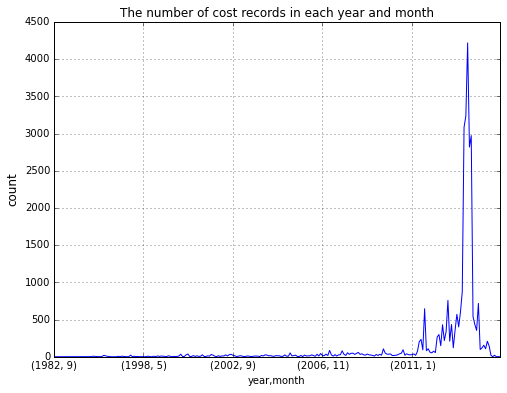

In [73]:
cost_count_by_year_month = train_df.groupby(['year', 'month']).cost.count()

plt.subplots(figsize=(8,6))
cost_count_by_year_month.plot()
plt.title('The number of cost records in each year and month', {'fontsize' : 'large'})
plt.ylabel('count', {'fontsize' : 'large'})
plt.grid()
plt.show()

We see that from 2011, the number of records increases significantly.

In [51]:
cost_count_by_year_month.ix[2011:]

year  month
2011  1          29
      2          38
      3          20
      4          73
      5         203
      6         234
      7          93
      8         646
      9          82
      10        108
      11         62
      12         53
2012  1          75
      2          57
      3         266
      4         299
      5         149
      6         431
      7         218
      8         341
      9         758
      10        209
      11        434
      12        121
2013  1         360
      2         571
      3         402
      4         602
      5         875
      6        3085
      7        3236
      8        4219
      9        2819
      10       2973
      11        540
      12        436
2014  1         354
      2         718
      3          98
      4         120
      5         156
      6         108
      7         209
      8         145
      9          20
      11          1
2015  1          21
      2           1
2016  1           3
2017  1 

Let's plot the median cost in each (year, month) group.

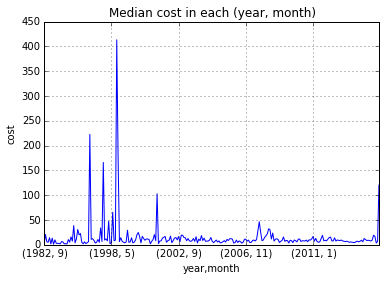

In [74]:
median_cost_by_year_month = train_df.groupby(by=['year', 'month']).cost.median()
median_cost_by_year_month.plot()
plt.title('Median cost in each (year, month)')
plt.ylabel('cost')
plt.grid()
plt.show()

But since only after 2011 there exists sufficient amount of quotes, let's zoom in to the post 2011 period.

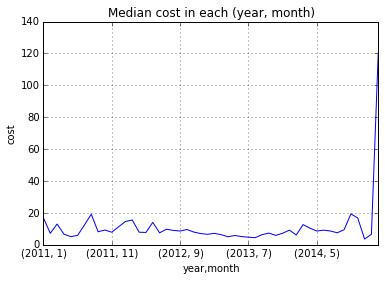

In [75]:
median_cost_by_year_month.ix[2011:].plot()
plt.title('Median cost in each (year, month)')
plt.ylabel('cost')
plt.grid()
plt.show()

The 'outliers' in the median cost space are shown below.

In [77]:
print median_cost_by_year_month[median_cost_by_year_month>50]

year  month
1996  11       222.534122
1997  11       166.041631
1998  7         65.461850
      11       413.286001
      12       177.203252
2001  5        102.895845
2017  1        120.329618
Name: cost, dtype: float64


We might be more interested in the distribution of the cost within each (year, month).

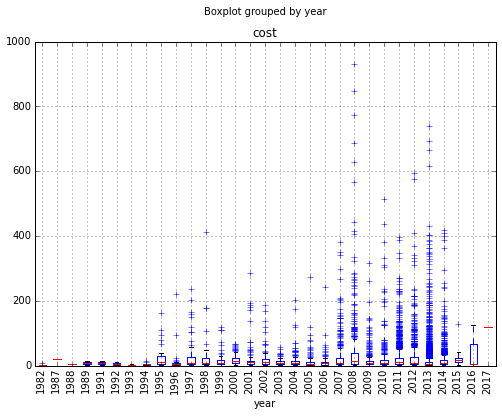

In [91]:
cost_by_year_month = train_df.groupby(by=['year', 'month']).cost

fig, ax = plt.subplots(figsize=(8, 6))
train_df.boxplot(column='cost', by='year', ax=ax)
# cost_by_year_month.plot(kind='box')

plt.xticks(rotation=90)
plt.show()

In [27]:
train_df_no_bracket = train_df[train_df.bracket_pricing == 'No']

In [28]:
train_df_no_bracket

tube_assembly_id              object
supplier                      object
quote_date            datetime64[ns]
annual_usage                   int64
min_order_quantity             int64
bracket_pricing               object
quantity                       int64
cost                         float64
dtype: object